# PAP2 V241: Wechselstromeigenschaften von RLC-Gliedern

popt und perr des Fits:
[  4.38945726e-05]
[  1.10867373e-06]
chisq= 2.71035609955
chisq_red= 0.301150677728
Fitwahrscheinlichkeit= 97.0 %


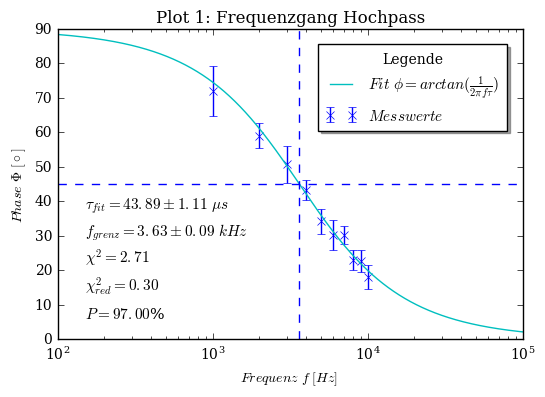

In [93]:
#Erstellen von Plot 1: Phasengang am Hochpass

#Import von allen benötigten Modulen
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2 #Für Fitgüte

#Einlesen der Daten aus Tabelle 3
f, p, dp = np.loadtxt('tab2.txt', usecols=(0,1,2), unpack=True)

#Fit an die Daten: 
def fit(ff, t):
    return (np.arctan(1/(2*np.pi*ff*t)))*(360/(2*np.pi))
    
popt, pcov = curve_fit(fit, f, p, sigma=dp, p0=[4.48506340e-05], maxfev=2000)
perr = np.sqrt(np.diag(pcov))
t=popt[0]
dt=perr[0]
fgrenz = (1/(popt[0]*2*np.pi)/1000)
dfgrenz = fgrenz*(dt/t)
x = np.linspace(0.001, 100000, 1000000)
y = np.linspace(0, 90, 1000)

#Güte des Fits
chisq=np.sum((fit(f,*popt)-p)**2/dp**2)
dof=9
chisq_red=chisq/dof
prob=round(1-chi2.cdf(chisq,dof),2)*100

#Plotten
plt.errorbar(f, p, dp, linestyle='none', marker='x', label=r'$Messwerte$', color='b')
plt.plot(x, fit(x, *popt), label=r'$Fit\ \phi=arctan(\frac{1}{2 \pi f \tau})$', color='c')
plt.axvline(x=(1/(t*2*np.pi)), linestyle = '--')
plt.axhline(y=45, linestyle = '--')

plt.xscale('log')
plt.grid(False)
plt.xlabel('$Frequenz\ f\  [Hz]$ ')
plt.ylabel(r'$Phase\ \Phi\ [\circ]$') #frac{U_{aus}}{\frac{1}{10}\U_{G}
plt.title('Plot 1: Frequenzgang Hochpass')
plt.legend(title='Legende', borderpad=0.5, borderaxespad=1, loc='upper right', shadow='true', fontsize=11)
plt.rcParams["font.family"]='serif'
plt.axis((100, 100000, 0, 90))

plt.text(150, 38, u'$\\tau_{fit}=%.2f \pm%.2f\ \mu s$' %(popt[0]*1000000, perr[0]*1000000), fontsize=11)
plt.text(150, 30, u'$f_{grenz}=%.2f \pm%.2f\ kHz$' %(fgrenz, dfgrenz), fontsize=11)
plt.text(150, 22, u'$\chi^{2}=%.2f$' %(chisq), fontsize=11)
plt.text(150, 14, u'$\chi_{red}^{2}=%.2f $' %(chisq_red), fontsize=11)
plt.text(150, 6, u'$P=%.2f $' %(prob) + '%', fontsize=11)

print('popt und perr des Fits:')
print(popt)
print(perr)
print('chisq=',chisq)
print('chisq_red=',chisq_red)
print('Fitwahrscheinlichkeit=',prob,'%')
       
#Speichern des Plots
#plt.savefig('v241_1.pdf')